<a href="https://colab.research.google.com/github/BudamaLakshmiPragnamanasvi/AIML-Tutorials/blob/main/AIML_Project_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project for Module 4: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

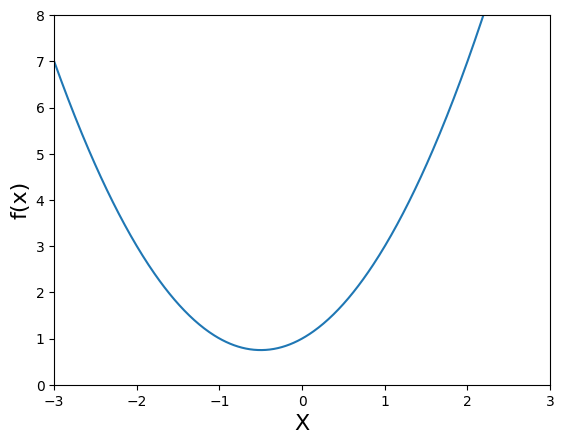

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x + 1

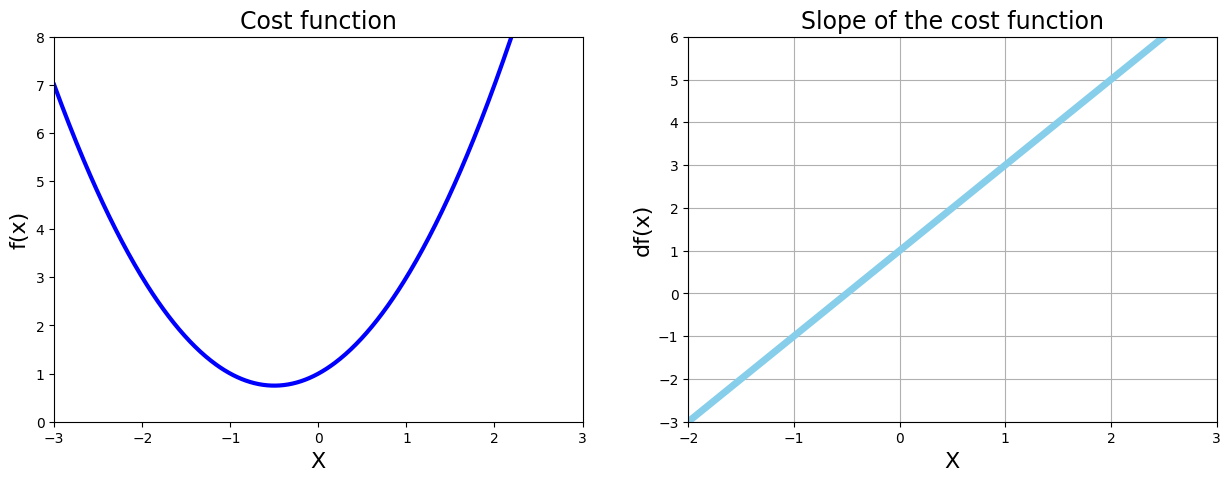

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [7]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


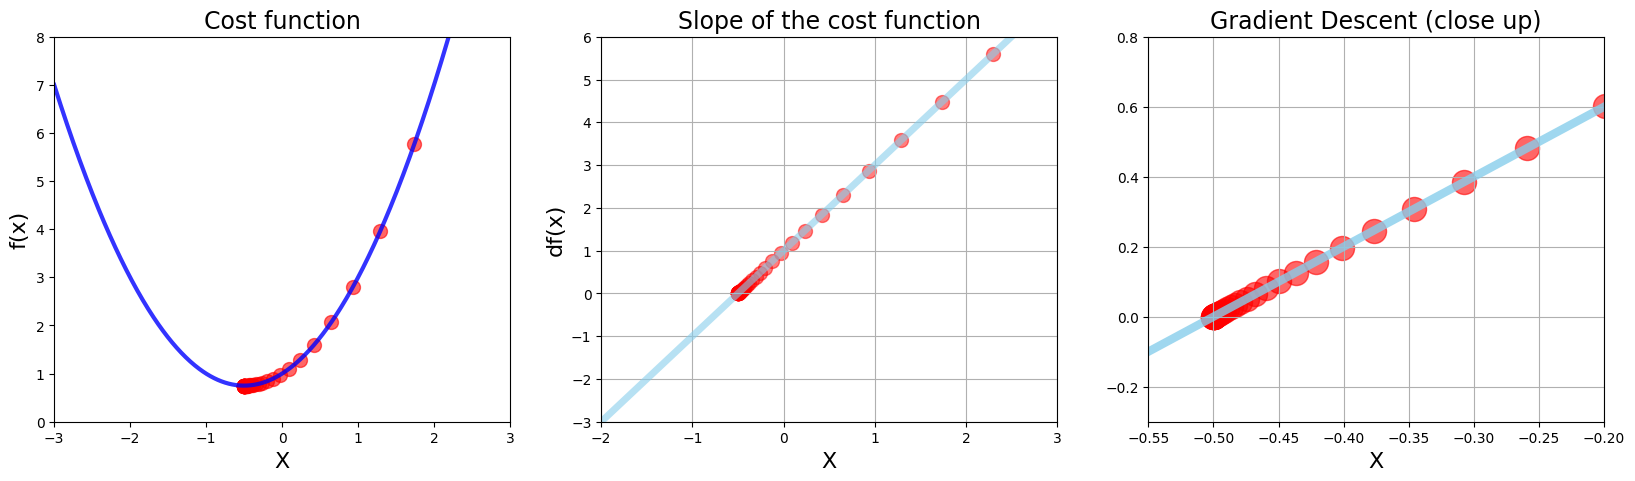

In [8]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**2

def dg(x):
    return 2**x


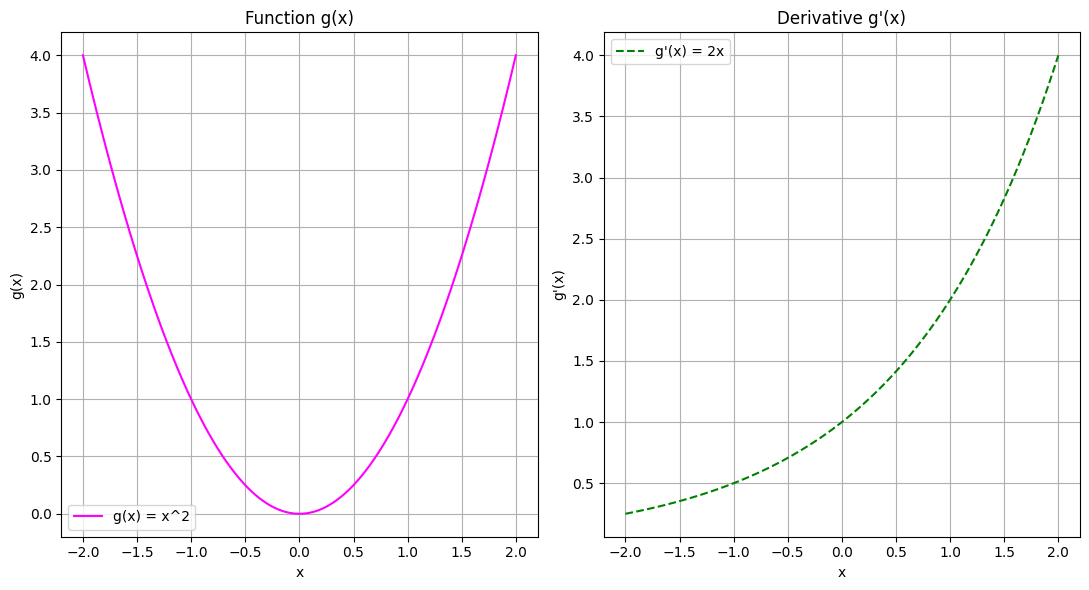

In [10]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
y_2 = g(x_2) # function values
dy_2 = dg(x_2) # derivative values
plt.figure(figsize=(11, 6))
# Plotting g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, y_2, label='g(x) = x^2', color='magenta')
plt.title('Function g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()
plt.legend()

# Plotting g'(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dy_2, label="g'(x) = 2x", color='green', linestyle='--')
plt.title("Derivative g'(x)")
plt.xlabel('x')
plt.ylabel("g'(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



## Gradient Descent

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.2867090059335236
Number of steps: 301


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.8060336015393896
Number of steps: 301


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.390030101018067
Number of steps: 301


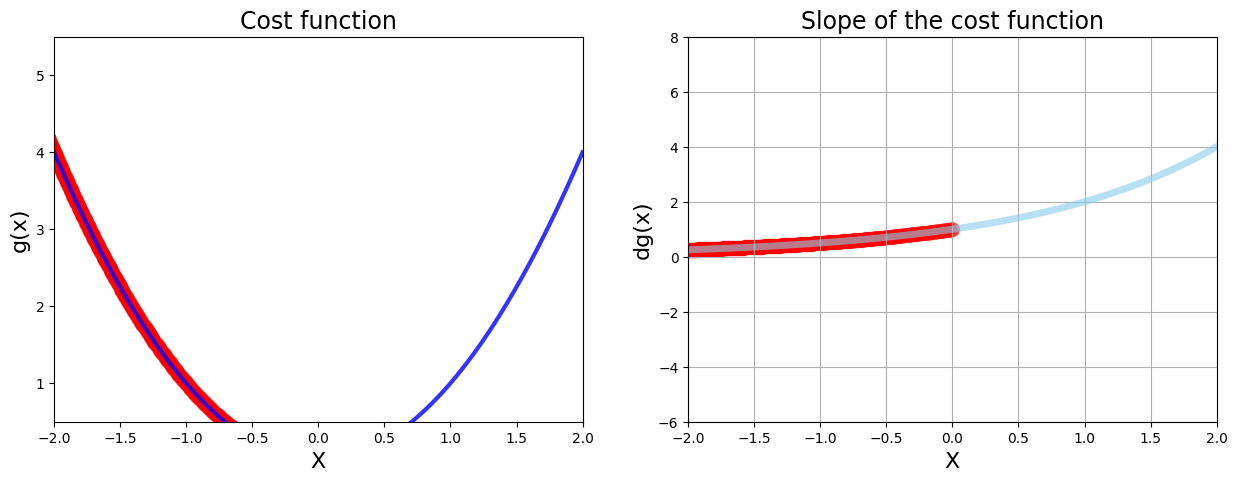

In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

In [16]:
## TASK-4 : Code the same things as they were done for the first two examples
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3



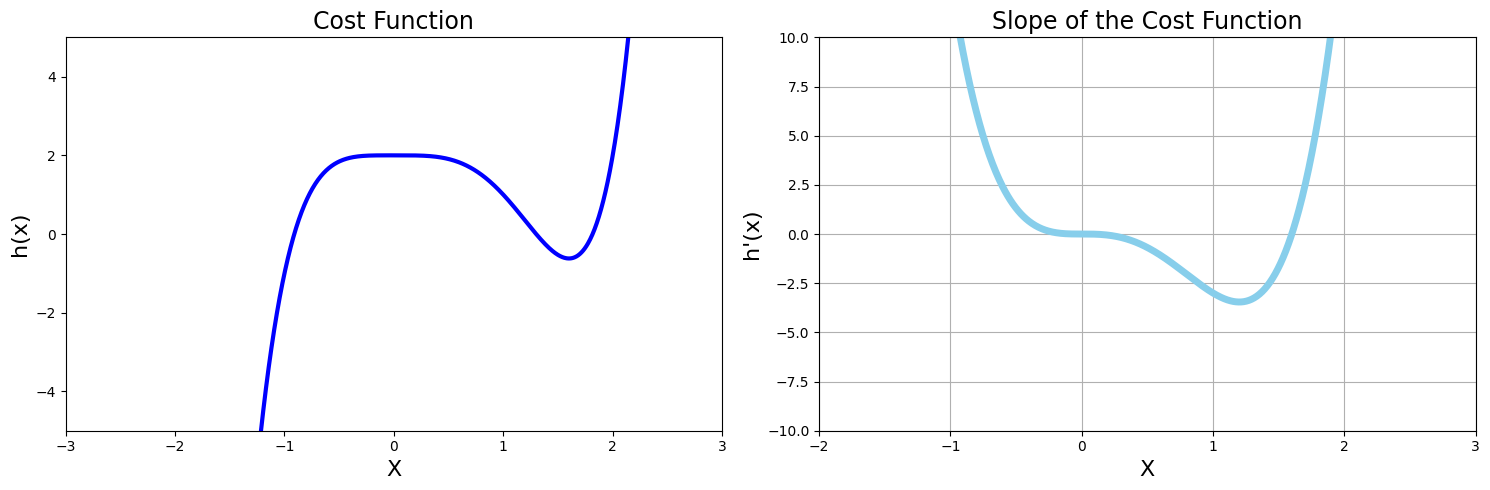

In [17]:
# TASK 4 Continuation.....

x_1 = np.linspace(-2, 3, 1000)

h_values = h(x_1)
dh_values = dh(x_1)

# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function (h(x))
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_1, h_values, color='blue', linewidth=3)

# 2nd Chart: Derivative of the cost function (h'(x))
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel("h'(x)", fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-10, 10)
plt.plot(x_1, dh_values, color='skyblue', linewidth=5)

plt.tight_layout()
plt.show()


In [19]:
# TASK 4 Continuation...

# Gradient Descent
new_x = 2.5
precision = 0.00001
step_multiplier = 0.01
max_iters = 1000


x_values = [new_x]
h_values = [h(new_x)]

# Gradient Descent Loop
for n in range(max_iters):
    previous_x = new_x
    gradient = dh(previous_x)
    new_x = previous_x - step_multiplier * gradient

    x_values.append(new_x)
    h_values.append(h(new_x))


    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print("Loop ran this many times:",n)
        break


print("Local minimum occurs at:", new_x)
print("Slope or dh(x) value at this point:", dh(new_x))
print("h(x) value or cost at this point:", h(new_x))

Loop ran this many times: 36
Local minimum occurs at: 1.6000338176875095
Slope or dh(x) value at this point: 0.000692630156748919
h(x) value or cost at this point: -0.6214399882886728


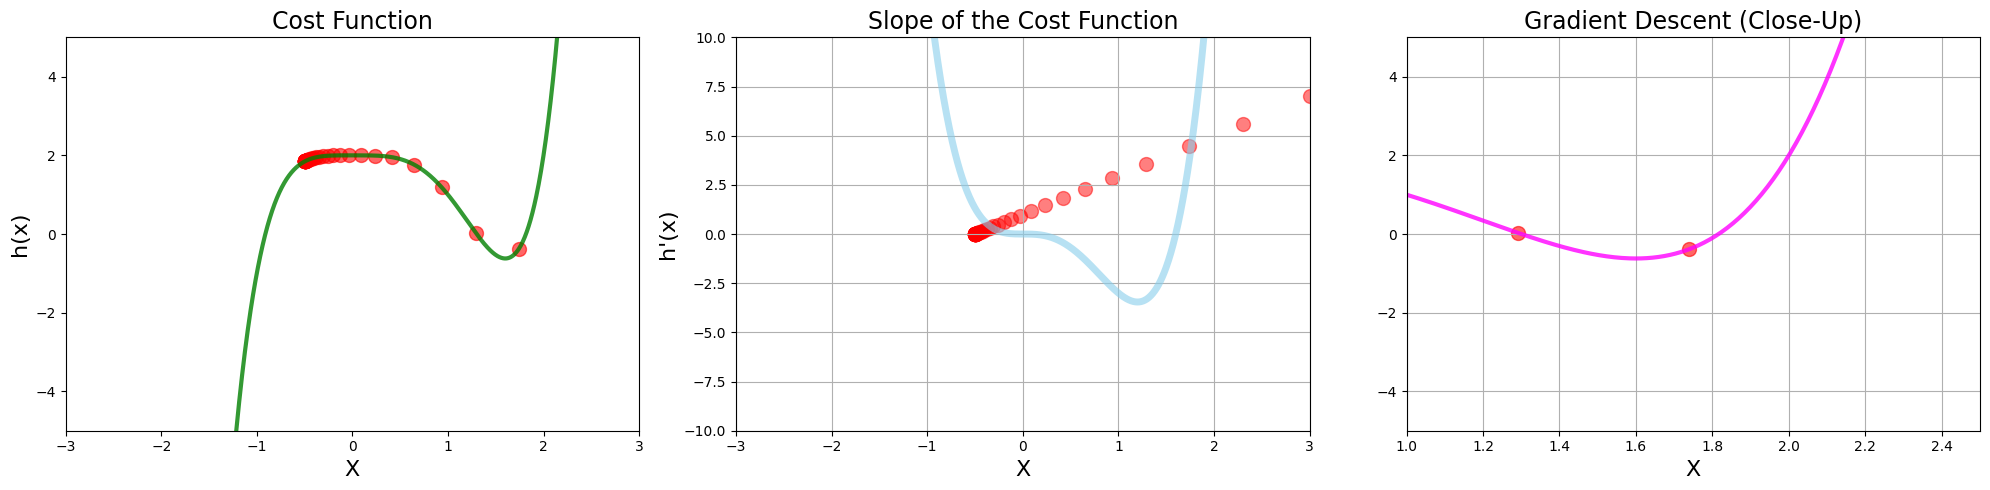

In [21]:
# TASK 4 Continuation....


# Visualization
plt.figure(figsize=[20, 5])

# 1. Plot the Cost Function
plt.subplot(1, 3, 1)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_1, h(x_1), color='green', linewidth=3, alpha=0.8)
plt.scatter(x_list, [h(x) for x in x_list], color='red', s=100, alpha=0.6)

# 2. Plot the Derivative
plt.subplot(1, 3, 2)
plt.xlim(-3, 3)
plt.ylim(-10, 10)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel("h'(x)", fontsize=16)
plt.grid()
plt.plot(x_1, dh(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3. Gradient Descent Close-Up
plt.subplot(1, 3, 3)
plt.xlim(1, 2.5)
plt.ylim(-5, 5)
plt.title('Gradient Descent (Close-Up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.plot(x_1, h(x_1), color='magenta', linewidth=3, alpha=0.8)
plt.scatter(x_list, [h(x) for x in x_list], color='red', s=100, alpha=0.6)

plt.tight_layout()
plt.show()


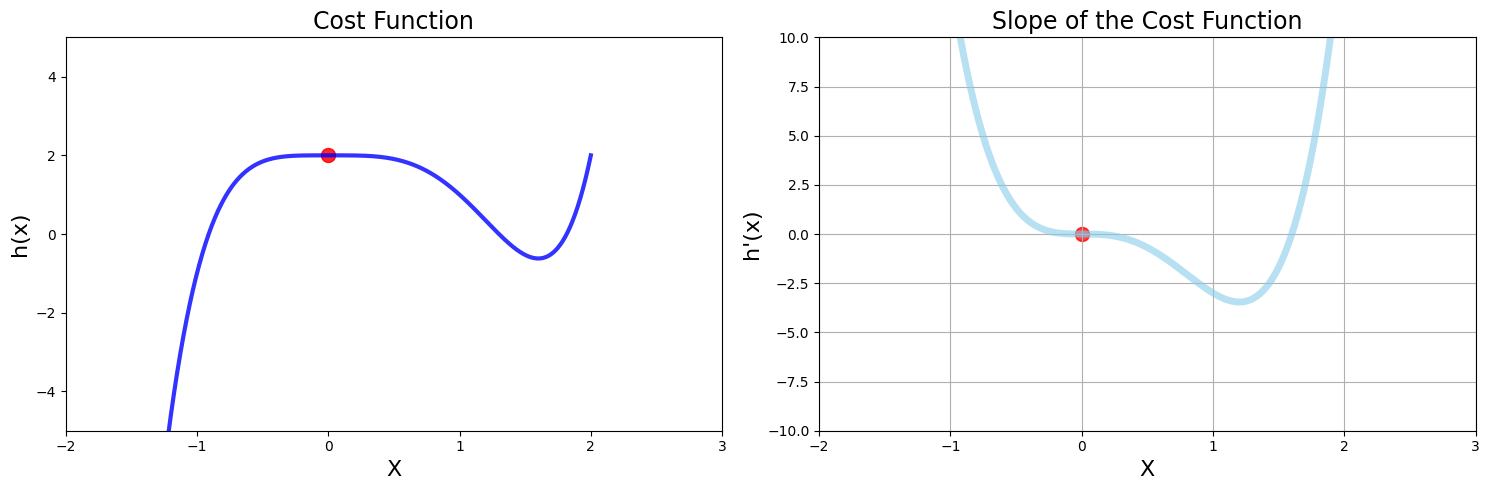

In [22]:
# Task 4 Continuation.......

#  Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=0)

plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 3)
plt.ylim(-5, 5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

# Plot h(x)
plt.plot(x_2, h(x_2), color='blue', linewidth=3, alpha=0.8)
# Scatter gradient descent steps
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 3)
plt.ylim(-10, 10)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel("h'(x)", fontsize=16)
plt.grid()

# Plot h'(x)
plt.plot(x_2, dh(x_2), color='skyblue', linewidth=5, alpha=0.6)
# Scatter gradient descent steps
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.tight_layout()
plt.show()



# The Learning Rate

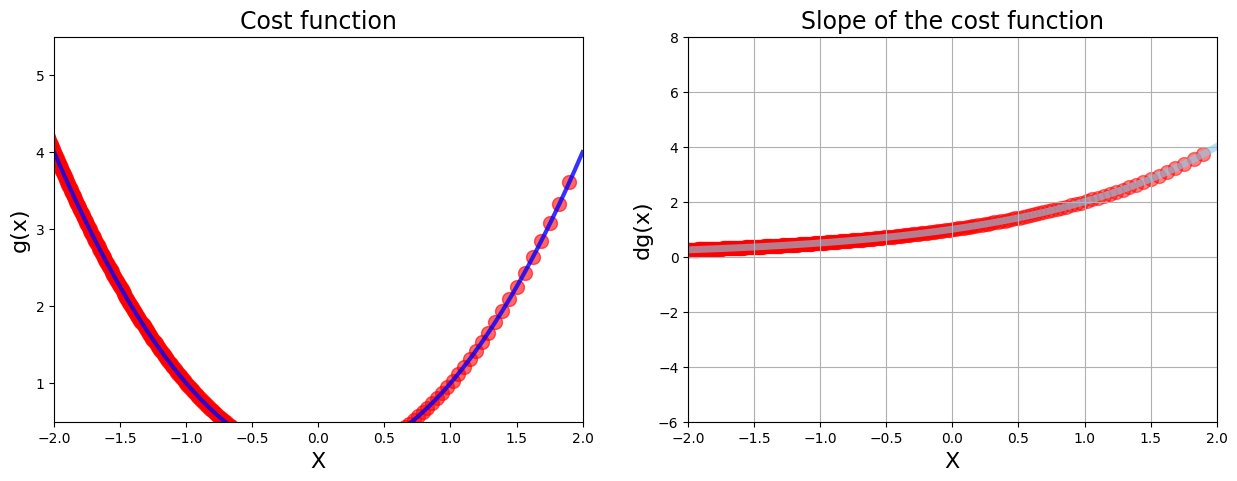

Number of steps is:  501


In [23]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

Run 1:
  Local minimum occurs at: -0.2247918640282931
  Number of steps: 301

Run 2:
  Local minimum occurs at: -2.0292465331982603
  Number of steps: 301

Run 3:
  Local minimum occurs at: 0.5851741552968799
  Number of steps: 301


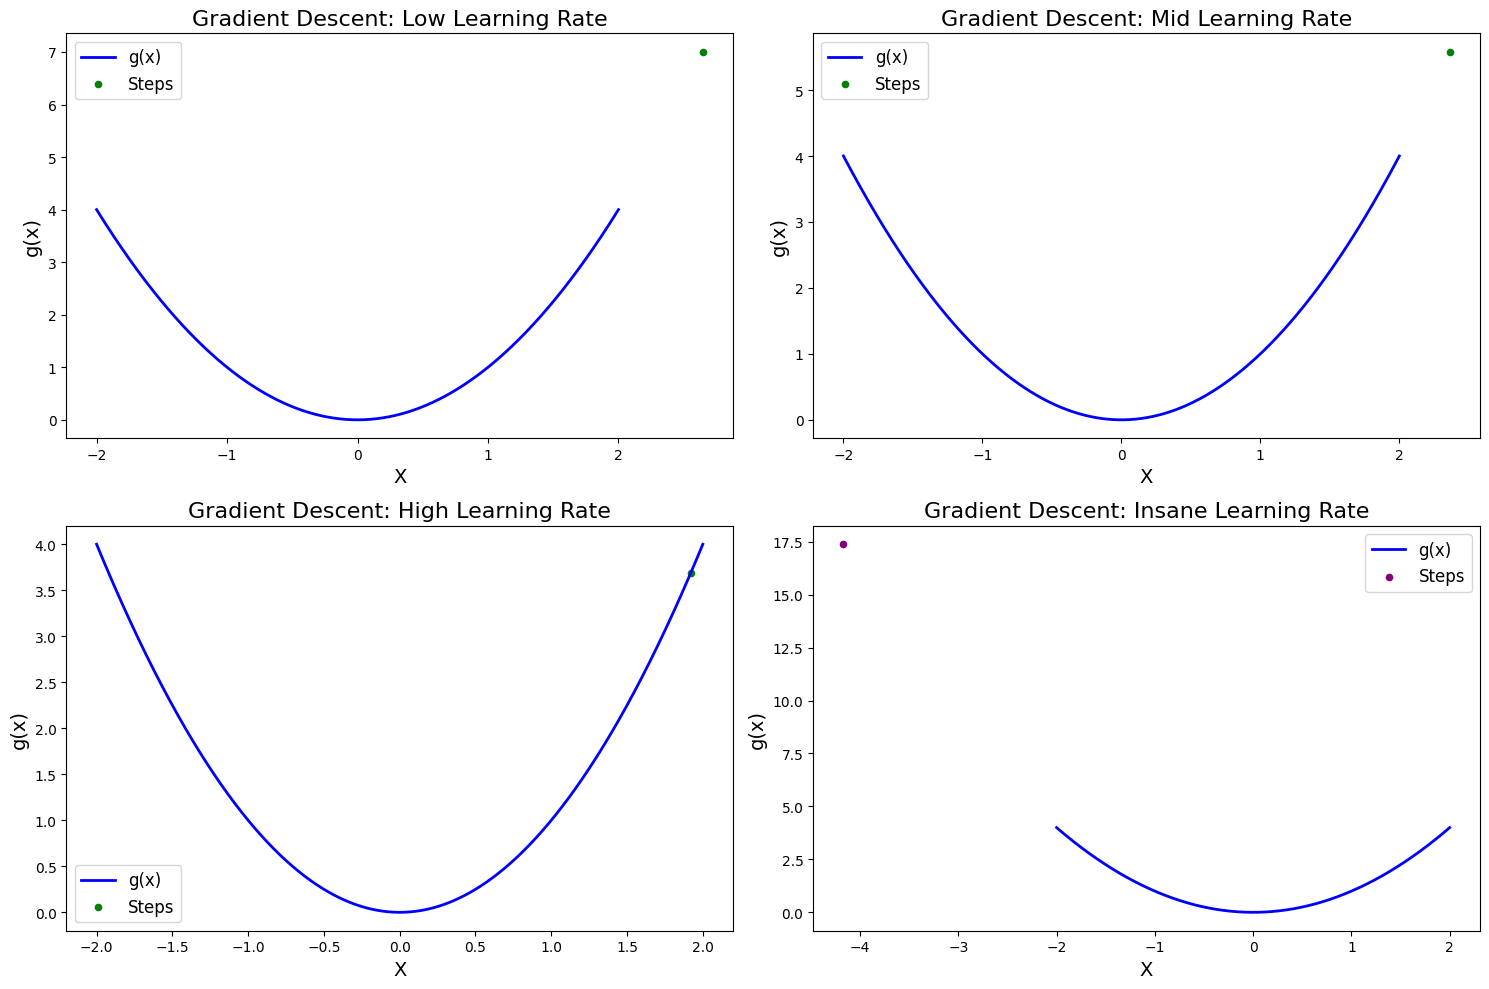

In [24]:
## TASK-5 : Run gradient descent 3 times
# 1st Run
local_min_1, list_x_1, deriv_list_1 = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.005,
    precision=0.0001
)
# 2nd Run
local_min_2, list_x_2, deriv_list_2 = gradient_descent(
    derivative_func=dg,
    initial_guess=-1,
    multiplier=0.01,
    precision=0.0001
)
# 3rd Run
local_min_3, list_x_3, deriv_list_3 = gradient_descent(
    derivative_func=dg,
    initial_guess=2,
    multiplier=0.002,
    precision=0.0001
)

print("Run 1:")
print(f"  Local minimum occurs at: {local_min_1}")
print(f"  Number of steps: {len(list_x_1)}")

print("\nRun 2:")
print(f"  Local minimum occurs at: {local_min_2}")
print(f"  Number of steps: {len(list_x_2)}")

print("\nRun 3:")
print(f"  Local minimum occurs at: {local_min_3}")
print(f"  Number of steps: {len(list_x_3)}")


## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)

plt.figure(figsize=[15, 10])

# Plot for low_gamma
plt.subplot(2, 2, 1)
plt.title('Gradient Descent: Low Learning Rate', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=2)
# Access the first element of the tuple (local_min)
plt.scatter(low_gamma[0], g(low_gamma[0]), color='green', s=20, label='Steps')
plt.legend(fontsize=12)
plt.xlabel('X', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

# Plot for mid_gamma
plt.subplot(2, 2, 2)
plt.title('Gradient Descent: Mid Learning Rate', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=2)
# Access the first element of the tuple (local_min)
plt.scatter(mid_gamma[0], g(mid_gamma[0]), color='green', s=20, label='Steps')
plt.legend(fontsize=12)
plt.xlabel('X', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

# Plot for high_gamma
plt.subplot(2, 2, 3)
plt.title('Gradient Descent: High Learning Rate', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=2)
# Access the first element of the tuple (local_min)
plt.scatter(high_gamma[0], g(high_gamma[0]), color='green', s=20, label='Steps')
plt.legend(fontsize=12)
plt.xlabel('X', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

# Plot for insane_gamma
plt.subplot(2, 2, 4)
plt.title('Gradient Descent: Insane Learning Rate', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=2)
# Access the first element of the tuple (local_min)
plt.scatter(insane_gamma[0], g(insane_gamma[0]), color='purple', s=20, label='Steps')
plt.legend(fontsize=12)
plt.xlabel('X', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.tight_layout()
plt.show()

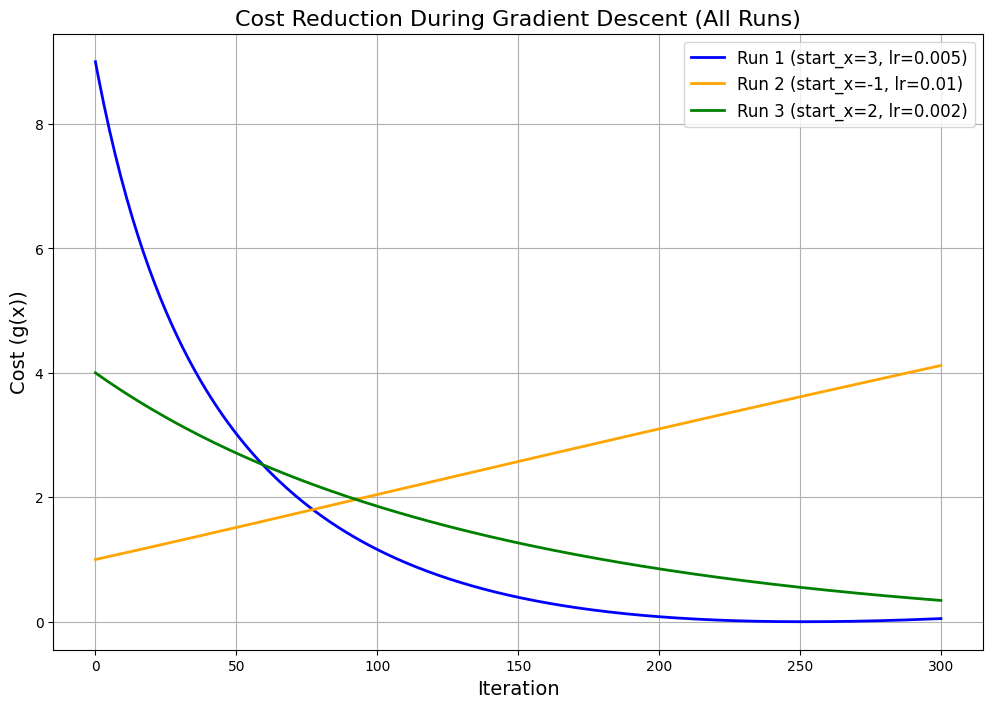

In [25]:
## TASK-7 : Plot reduction in cost for each iteration

def calculate_cost(func, x_list):
    return [func(x) for x in x_list]

# Gradient descent runs with different initial parameters
local_min_1, list_x_1, deriv_list_1 = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.005,
    precision=0.0001
)

local_min_2, list_x_2, deriv_list_2 = gradient_descent(
    derivative_func=dg,
    initial_guess=-1,
    multiplier=0.01,
    precision=0.0001
)

local_min_3, list_x_3, deriv_list_3 = gradient_descent(
    derivative_func=dg,
    initial_guess=2,
    multiplier=0.002,
    precision=0.0001
)

# Calculate cost values for each run
cost_values_1 = calculate_cost(g, list_x_1)
cost_values_2 = calculate_cost(g, list_x_2)
cost_values_3 = calculate_cost(g, list_x_3)

# Plotting
plt.figure(figsize=[12, 8])

# First run
plt.plot(cost_values_1, label='Run 1 (start_x=3, lr=0.005)', color='blue', linewidth=2)
# Second run
plt.plot(cost_values_2, label='Run 2 (start_x=-1, lr=0.01)', color='orange', linewidth=2)
# Third run
plt.plot(cost_values_3, label='Run 3 (start_x=2, lr=0.002)', color='green', linewidth=2)

# Plot details
plt.title('Cost Reduction During Gradient Descent (All Runs)', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Cost (g(x))', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## By changing the initial guess values, we can continuously change the graph slopes.


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [27]:
## TASK-8 : Code the same things as they were done for the first two example
def f(x, y):
    return 1 / (3**(-x**2 - y**2)) + 1

def df_dx(x, y):
    return (-2 * x * np.log(3)) * 3**(-x**2 - y**2)

def df_dy(x, y):
    return (-2 * y * np.log(3)) * 3**(-x**2 - y**2)

# Gradient descent function for multivariate functions
def gradient_descent_multivariate(start_x, start_y, learning_rate, precision, max_iter=100):
    x, y = start_x, start_y
    x_list, y_list, cost_list = [x], [y], [f(x, y)]

    for _ in range(max_iter):
        # Compute gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)

        # Update x and y
        new_x = x - learning_rate * grad_x
        new_y = y - learning_rate * grad_y

        # Stop if changes are smaller than precision
        if abs(new_x - x) < precision and abs(new_y - y) < precision:
            break

        # Update values and store results
        x, y = new_x, new_y
        x_list.append(x)
        y_list.append(y)
        cost_list.append(f(x, y))

    return x, y, x_list, y_list, cost_list

# Run gradient descent
start_x, start_y = 3, 3
learning_rate = 0.01
precision = 0.0001

final_x, final_y, x_list, y_list, cost_list = gradient_descent_multivariate(
    start_x=start_x, start_y=start_y, learning_rate=learning_rate, precision=precision
)

# Print results
print(f"Local minimum occurs at: ({final_x:.4f}, {final_y:.4f})")
print(f"Number of iterations: {len(x_list)}")


Local minimum occurs at: (3.0000, 3.0000)
Number of iterations: 1


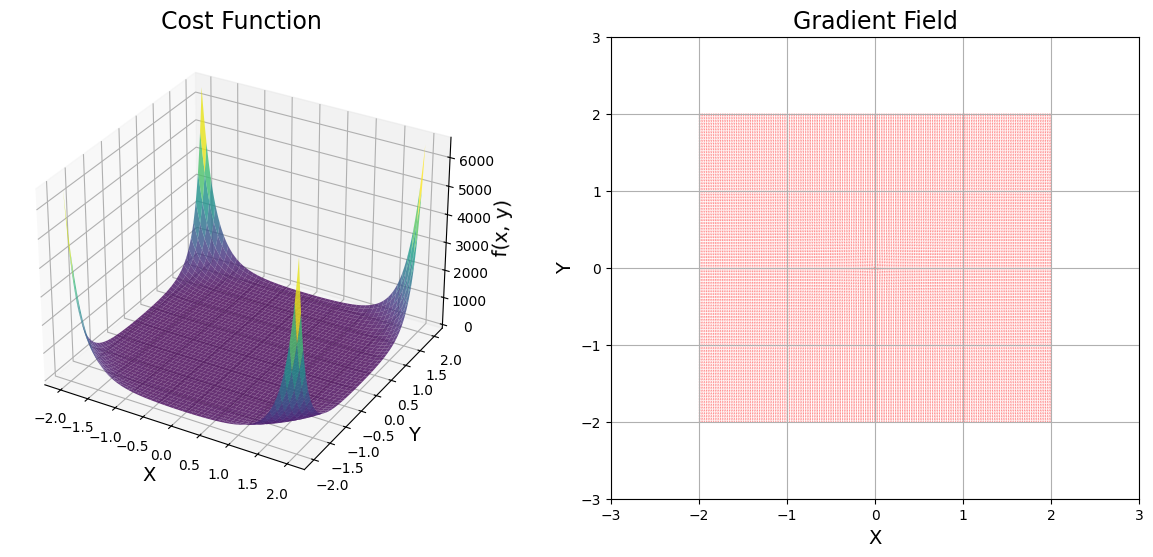

In [30]:
# TASK 8 Continuation......
from mpl_toolkits.mplot3d import Axes3D

# Define grid for plotting
x_vals = np.linspace(start=-2, stop=2, num=200)
y_vals= np.linspace(start=-2, stop=2, num=200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute gradients for quiver plot
grad_x = df_dx(X, Y)
grad_y = df_dy(X, Y)

# Plotting
plt.figure(figsize=[15, 6])

# 1 Chart: Cost function (3D surface)
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('Cost Function', fontsize=17)
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Y', fontsize=14)
ax1.set_zlabel('f(x, y)', fontsize=14)

# 2 Chart: Gradient (2D quiver plot)
plt.subplot(1, 2, 2)
plt.title('Gradient Field', fontsize=17)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()

# Normalize gradients for better visualization
norm = np.sqrt(grad_x**2 + grad_y**2)
plt.quiver(X, Y, grad_x / norm, grad_y / norm, color='red', alpha=0.8)

plt.show()


In [31]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


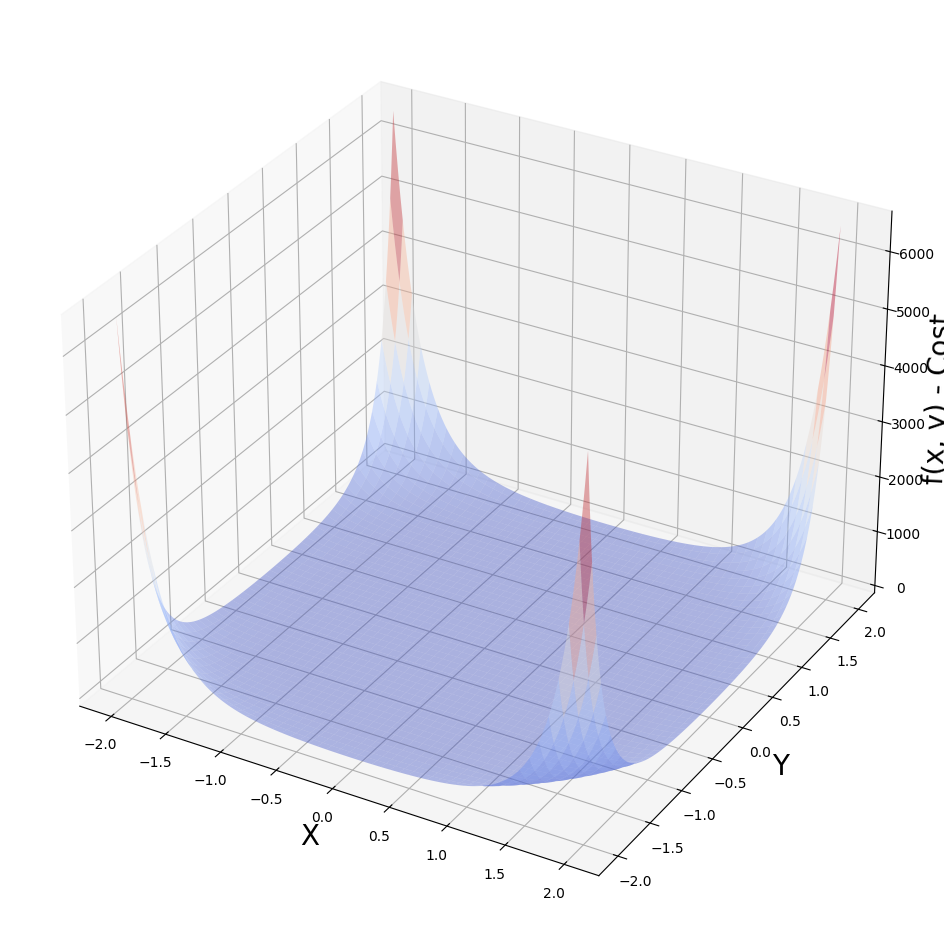

In [32]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

##########################
##########################

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation
## $$\frac{\partial f}{\partial x} = -2xln(3)3^{-x^2-y^2}$$
## $$\frac{\partial f}{\partial y} = -2yln(3)3^{-x^2-y^2}$$

In [33]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  3**(x**2 + y**2) + 1
Partial derivative wrt x is:  2*3**(x**2 + y**2)*y*log(3)
Value of f(x,y) at x=1.8 y=1.0 is:  106.437262096007
Value of partial derivative wrt x:  417.004818559895


## Batch Gradient Descent with SymPy

In [35]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

# Limit the magnitude of the gradients to prevent overflow
gradient_limit = 1e10  # Choose a suitable limit

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})

    # Clip the gradients if they exceed the limit
    gradient_x = min(max(gradient_x, -gradient_limit), gradient_limit)
    gradient_y = min(max(gradient_y, -gradient_limit), gradient_limit)

    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-1.e+10 -1.e+10]
Minimum occurs at x value of:  999999960.099518
Minimum occurs at y value of:  999999977.833066
The cost is:  1.84212844919398e+954242450211958870


In [36]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return -2 * x * np.log(3) * 3**(-x**2 - y**2)  # Partial derivative with respect to x

def fpy(x, y):
    return -2 * y * np.log(3) * 3**(-x**2 - y**2)  # Partial derivative with respect to y


In [37]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-0.00325478 -0.00180821]
Minimum occurs at x value of:  2.2581848609477344
Minimum occurs at y value of:  1.254547144970963
The cost is:  1528.4509040158528


## Graphing 3D Gradient Descent

In [38]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [-0.00761567 -0.00423093]
Minimum occurs at x value of:  2.112671871473792
Minimum occurs at y value of:  1.1737065952632175
The cost is:  613.1399846189456


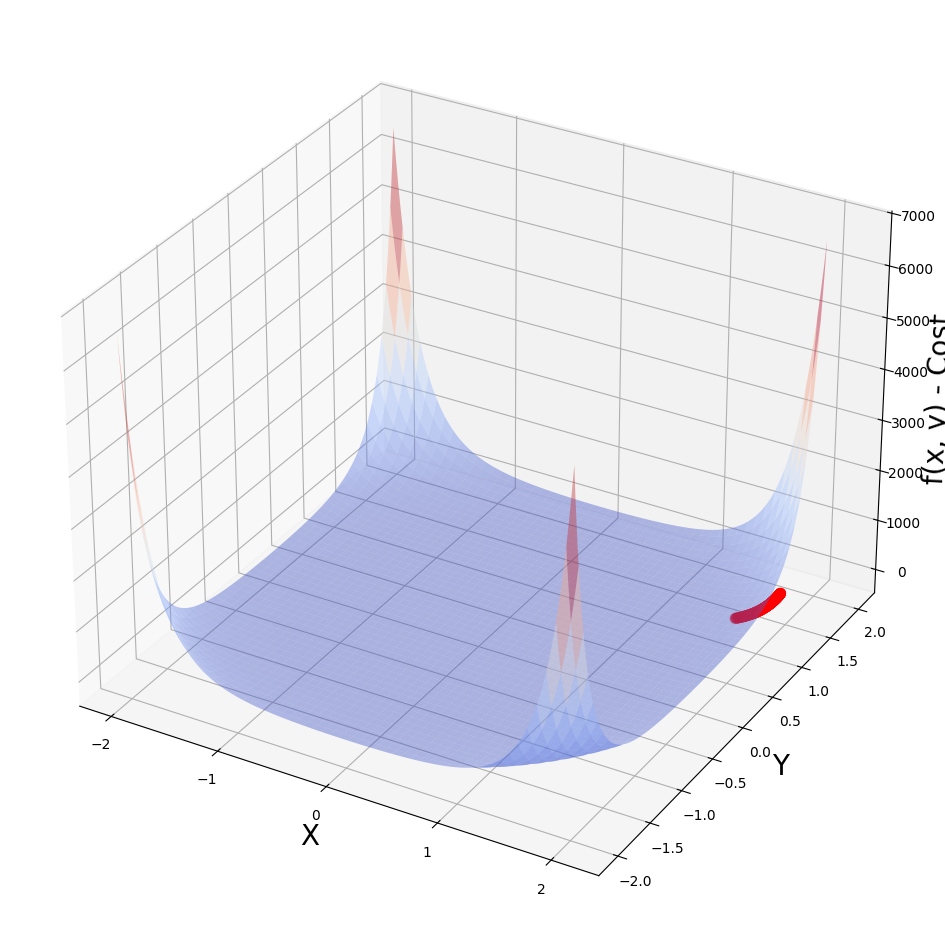

In [39]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [40]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [41]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


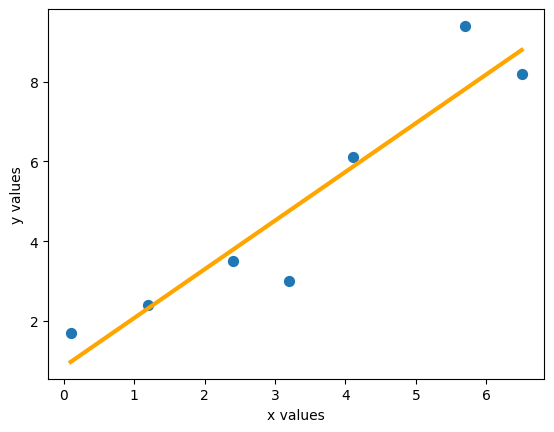

In [42]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [43]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [44]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [45]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [46]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [47]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-47-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


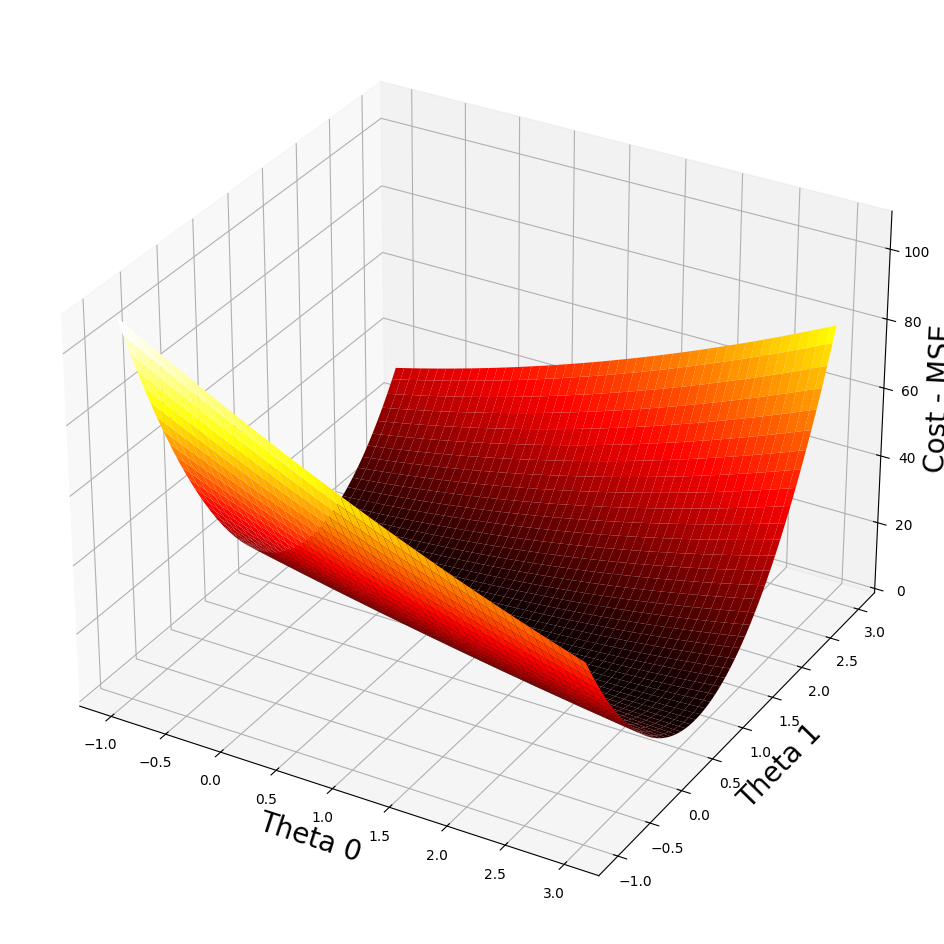

In [48]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [49]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [50]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [51]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


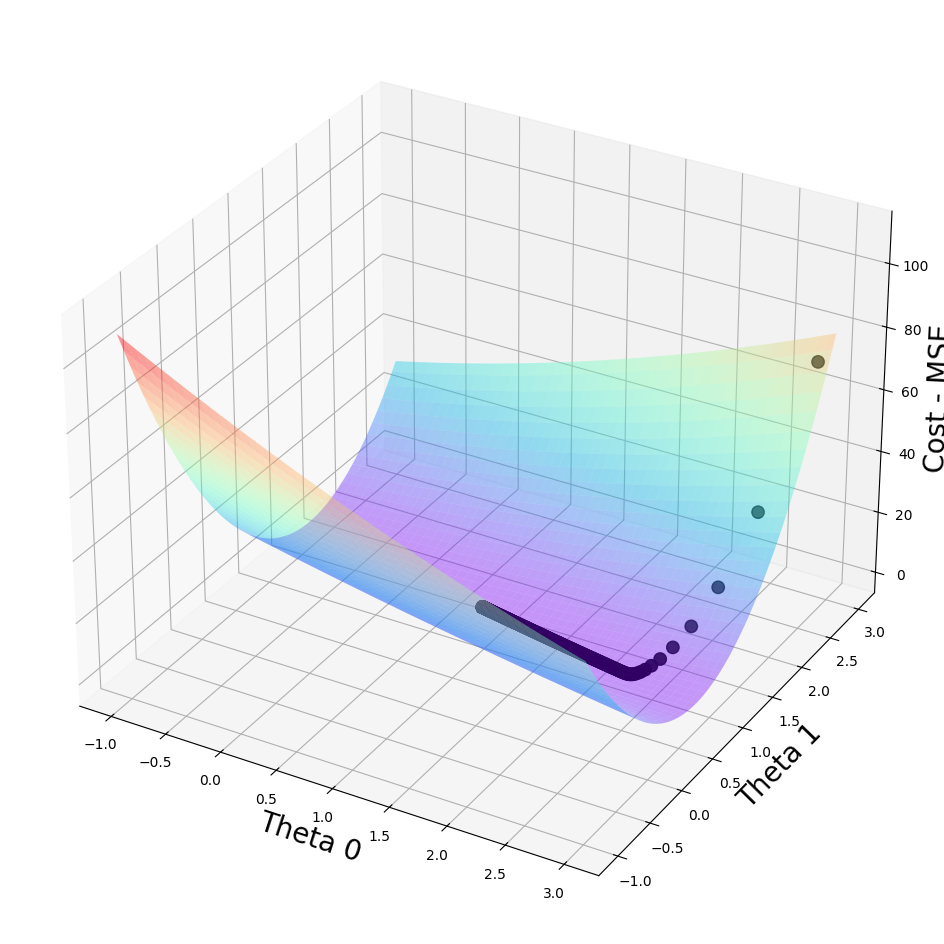

In [52]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()

## *** All the [Required] places have been replaced with the required code***